# Fitting a single temperature profile.

Import libraries

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import netCDF4

Import the `fit_profile` from SHDR file. The ``SHDR.py`` file should be in the current working directory

In [15]:
from SHDR import fit_profile #Important! SHDR.py file should be in the working directory

Import your data. Here we use netCDF4 python library to load a CTD dataset from the IFREMER OCEANSITES server.

In [16]:
url_data = 'https://tds0.ifremer.fr/thredds/dodsC/CORIOLIS-OCEANSITES-GDAC-OBS/DATA/SATS/OS_SATS_201811_P_CTD-S7.nc'
with netCDF4.Dataset(url_data, 'r') as ds:
    time = ds['TIME'][:]
    temp = ds['TEMP'][:]
    sal = ds['PSAL'][:]
    depth = ds['PRES'][:]
    lat = ds['LATITUDE'][:]
    lon = ds['LONGITUDE'][:]

Pass data to the `fit_profile` function

In [12]:
result = fit_profile(temp, depth, max_depth=200)

The value of `max_depth` is important to select the approximate extent of the upper ocean features in the dataset, and have the algorithm only fit this region.  If we weren't to do this and the profile was deep while the MLD and season thermocline relatively shallow, the algorithm might converge to wrong solutions, since most datapoints would be in regions that are unrelated to the idealised target function.

The output is a np.ndarray with the best estimates for the parameters in the following order: `[D1, b2, c2, b3, a2, a1, a3, em]`. If you want to use SHDR as an MLD identifying method, set the argument `only_MLD` to `True`. This will only return `[D1]`. 

Please run `help(fit_profile)` or refer to the user manual to see all available arguments.

## Plotting the results
The function `plot_profile_fit` from the `SHDR_utils` module allows to plot a fitted profile alongside with it's fit. It returns a minimal plot with little features to quickly explore the results. Feel free to modify it to your needs!!

In [14]:
from SHDR_utils import plot_profile_fit # again, SHDR_utils in working directory

/home/manu/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/manu/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/manu/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/manu/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig

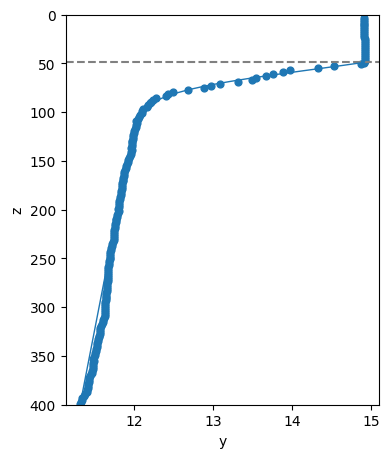

In [13]:
plot_profile_fit(temp, depth, result, max_z=400) 

The grey dashed lines marks the MLD (D_1 parameter).

If the profile is deep, use the `max_z` parameter in a similar way to previously
to better visualize the upper ocean features. Have fun!